# Prediction using Unsupervised ML


Author: Serag el-dein Amged

## Importing libraries

In [9]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Importing the dataset

In [10]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
X = df.iloc[:,[1,2,3,4]].values


## Using the Elbow method to find the optimal number of clusters

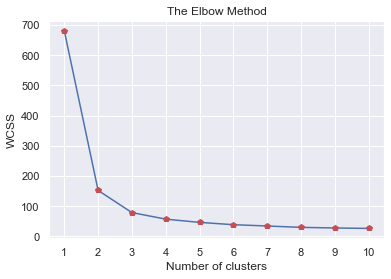

In [13]:
wcss = []
for i in range(1,11):
    kmeans_temp = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_temp.fit(X)
    wcss.append(kmeans_temp.inertia_)


#plt.figure(figsize=(10,5))
plt.plot(range(1,11), wcss)
plt.plot(range(1,11), wcss,'p',color = 'r')
plt.xticks(range(1,11))
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Looks like 3 is the best number of clusters

## Training the K-Means model on the dataset


In [14]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Data Visualisation

In [15]:
def query1(name):
    return df.query(f'Species == "{name}"').iloc[:,[1]].values
def query2(name):
    return df.query(f'Species == "{name}"').iloc[:,[3]].values

## Visualising the Predicted Clusters Vs True Clusters

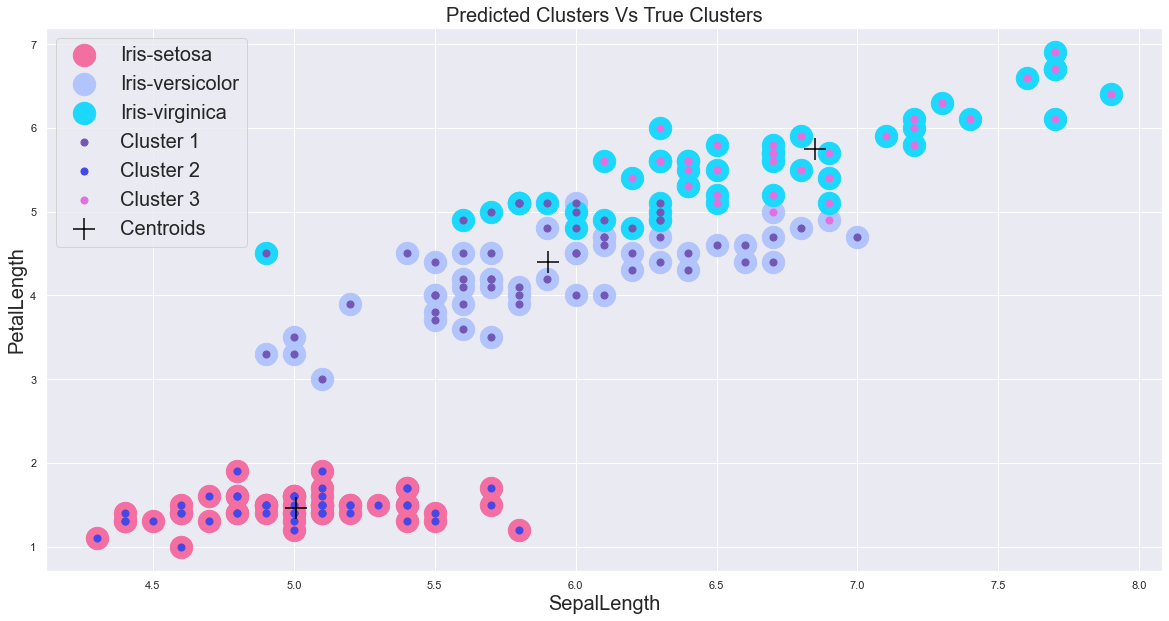

In [16]:
plt.figure(figsize=(20,10))

# Visualising the data  on the first and third columns
plt.scatter(query1('Iris-setosa'), query2('Iris-setosa'), 
            s = 500, c = '#F36EA1', label = 'Iris-setosa')

plt.scatter(query1('Iris-versicolor'), query2('Iris-versicolor'), 
            s = 500, c = '#B2C4FC',label = 'Iris-versicolor')

plt.scatter(query1('Iris-virginica'), query2('Iris-virginica'),
            s = 500, c = '#1CD8FE', label = 'Iris-virginica')


## Visualising the cluster On the first and third columns
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 2], 
            s = 50, c = '#7258B4',label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 2], 
            s = 50, c = '#4448E6',label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 2],
            s = 50, c = '#E271DF',label = 'Cluster 3')


#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,2], 
           s = 500, c = 'black', label = 'Centroids',marker='+')

plt.title('Predicted Clusters Vs True Clusters',fontsize = 20)
plt.xlabel('SepalLength',fontsize = 20)
plt.ylabel('PetalLength',fontsize = 20)
plt.legend(fontsize = 20);

## Visualising the clusters

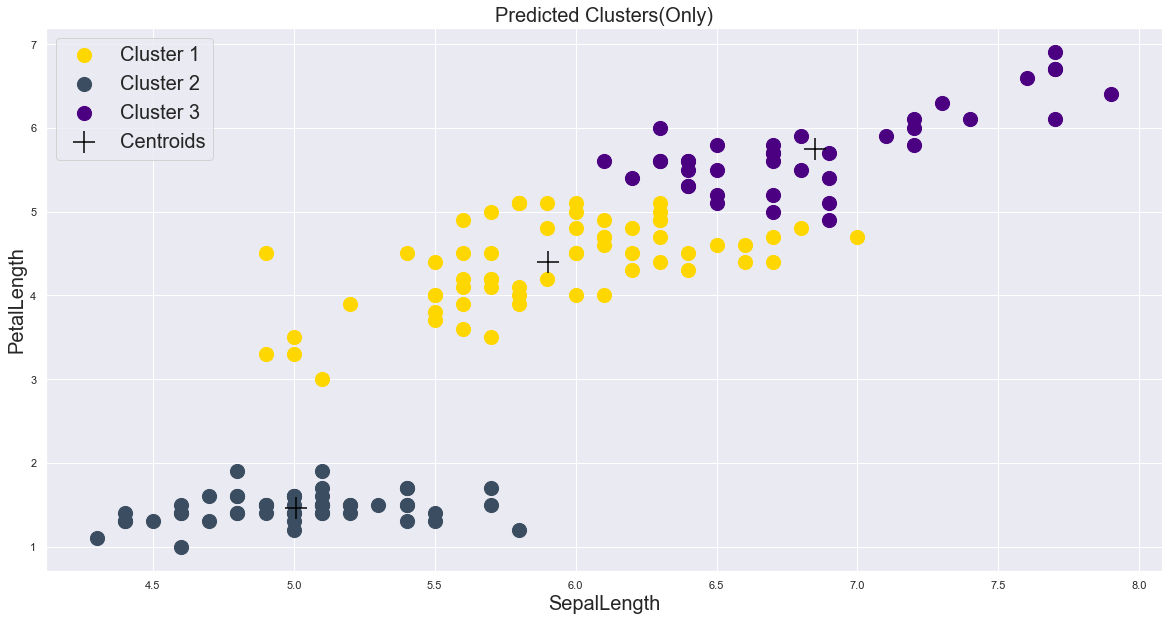

In [17]:
plt.figure(figsize=(20,10))

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 2], 
            s = 200, c = 'gold',label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 2], 
            s = 200, c = '#3b4d61',label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 2],
            s = 200, c = 'indigo',label = 'Cluster 3')


#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,2], 
           s = 500, c = 'black', label = 'Centroids',marker='+')

plt.title('Predicted Clusters(Only)',fontsize = 20)
plt.xlabel('SepalLength',fontsize = 20)
plt.ylabel('PetalLength',fontsize = 20)
plt.legend(fontsize = 20);